# Within - Between Variance Decomposition

### Author:
- Sergio García Prado ([garciparedes.me](https://garciparedes.me))

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data(iris)

In [3]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
(group.means <- as.matrix(iris %>%
    group_by(Species) %>%
    summarise(Sepal.Length.mean = mean(Sepal.Length,na.rm = TRUE),
             Sepal.Width.mean = mean(Sepal.Width,na.rm = TRUE),
             Petal.Length.mean = mean(Petal.Length,na.rm = TRUE),
             Petal.Width.mean = mean(Petal.Width,na.rm = TRUE)) %>%
    select(-Species)))

Sepal.Length.mean,Sepal.Width.mean,Petal.Length.mean,Petal.Width.mean
5.006,3.428,1.462,0.246
5.936,2.770,4.260,1.326
6.588,2.974,5.552,2.026


In [5]:
(total.mean <- as.vector(iris %>%
    summarise(Sepal.Length.mean = mean(Sepal.Length,na.rm = TRUE),
             Sepal.Width.mean = mean(Sepal.Width,na.rm = TRUE),
             Petal.Length.mean = mean(Petal.Length,na.rm = TRUE),
             Petal.Width.mean = mean(Petal.Width,na.rm = TRUE))))

Sepal.Length.mean,Sepal.Width.mean,Petal.Length.mean,Petal.Width.mean
5.843333,3.057333,3.758,1.199333


In [6]:
(n.groups <- (iris %>%
    group_by(Species) %>%
    summarise(n = n()) %>%
    select(-Species)) %>%
    pull(n))

[1] 50 50 50

In [7]:
t(t(select(iris, -Species)[1:50,])  - group.means[1,])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,0.094,0.072,-0.062,-0.046
2,-0.106,-0.428,-0.062,-0.046
3,-0.306,-0.228,-0.162,-0.046
4,-0.406,-0.328,0.038,-0.046
5,-0.006,0.172,-0.062,-0.046
6,0.394,0.472,0.238,0.154
7,-0.406,-0.028,-0.062,0.054
8,-0.006,-0.028,0.038,-0.046
9,-0.606,-0.528,-0.062,-0.046
10,-0.106,-0.328,0.038,-0.146


In [8]:
W.1 <- t(t(t(select(iris, -Species)[1:50,]) - group.means[1,])) %*% t(t(select(iris, -Species)[1:50,]) - group.means[1,])
W.2 <- t(t(t(select(iris, -Species)[51:100,]) - group.means[2,])) %*% t(t(select(iris, -Species)[51:100,]) - group.means[2,])
W.3 <- t(t(t(select(iris, -Species)[101:150,]) - group.means[3,])) %*% t(t(select(iris, -Species)[101:150,]) - group.means[3,])
(W <- W.1 + W.2 + W.3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,38.9562,13.6300,24.6246,5.6450
Sepal.Width,13.6300,16.9620,8.1208,4.8084
Petal.Length,24.6246,8.1208,27.2226,6.2718
Petal.Width,5.6450,4.8084,6.2718,6.1566


In [9]:
(B <- t(sweep(group.means, 2, t(total.mean), '-')) %*% diag(n.groups) %*% (sweep(group.means, 2, t(total.mean), '-')))

,Sepal.Length.mean,Sepal.Width.mean,Petal.Length.mean,Petal.Width.mean
Sepal.Length.mean,63.21213,-19.95267,165.2484,71.27933
Sepal.Width.mean,-19.95267,11.34493,-57.2396,-22.93267
Petal.Length.mean,165.24840,-57.23960,437.1028,186.77400
Petal.Width.mean,71.27933,-22.93267,186.7740,80.41333


In [10]:
u <- eigen(solve(W) %*% B)$vectors

In [11]:
diag(t(u) %*% (solve(W) %*% B) %*% u)

[1]  3.219193e+01  2.853910e-01 -1.776357e-15  0.000000e+00

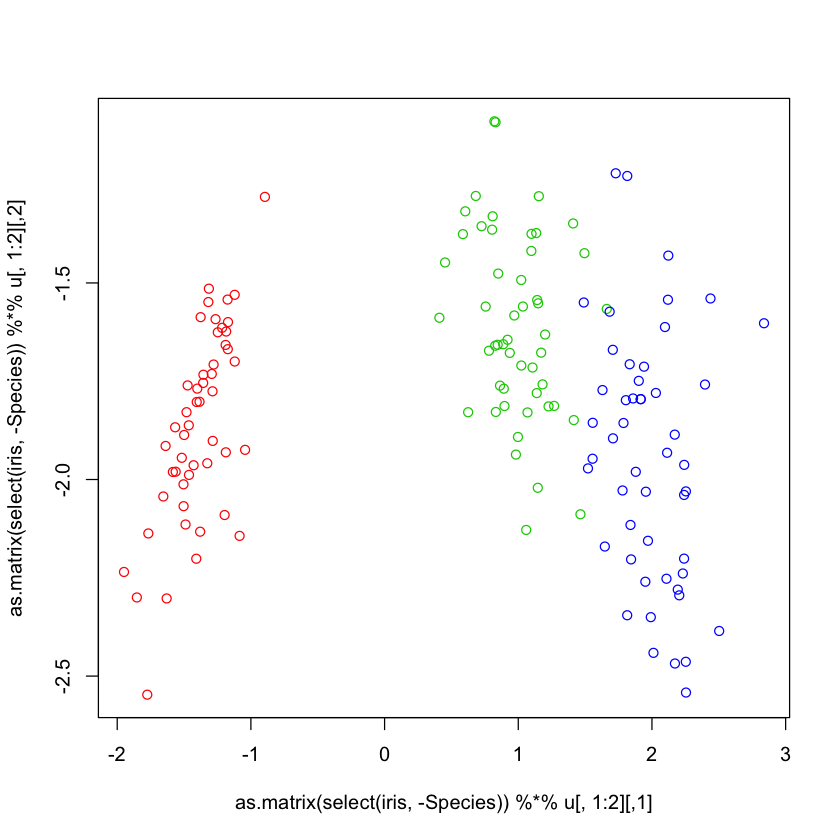

In [12]:

plot(as.matrix(select(iris, -Species)) %*% u[,1:2], 
     col = as.numeric(iris[,5])+1)